In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

## Preprocessing the Data for CNN

In [2]:
DATADIR = "C:/Users/YASHIM GABRIEL/Desktop/Real data for use/Testset"
CATEGORIES = ["No_tumor", "Tumor"]

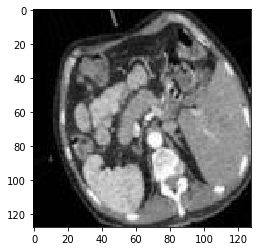

In [21]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to the two class of data (Tumor/No_tumor)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

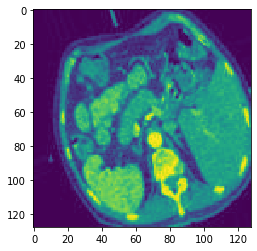

In [19]:
plt.imshow(img_array)
plt.show()

In [22]:
print(img_array.shape)

(128, 128)


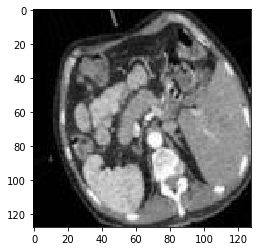

In [23]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [24]:
training_data =[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to the two class of data (Tumor/No_tumor)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [25]:
print(len(training_data))

118


In [27]:
training_data

[[array([[1, 0, 0, ..., 1, 1, 1],
         [1, 0, 0, ..., 1, 1, 1],
         [1, 0, 0, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 2, 2, 1],
         [1, 1, 1, ..., 2, 2, 1],
         [1, 1, 1, ..., 2, 2, 1]], dtype=uint8), 0],
 [array([[  1,   1,   1, ...,   0,   0,   7],
         [  1,   1,   1, ...,  11,   5,   0],
         [  1,   1,   1, ...,   6,   5,   0],
         ...,
         [  3,   3,   3, ..., 107,  88,  63],
         [  1,   1,   1, ..., 108,  93,  69],
         [  0,   0,   0, ..., 107,  96,  73]], dtype=uint8), 0],
 [array([[20, 26, 36, ..., 30, 25, 32],
         [21, 25, 30, ..., 27, 25, 36],
         [23, 23, 24, ..., 28, 23, 28],
         ...,
         [30, 39, 52, ..., 58, 58, 58],
         [41, 50, 63, ..., 58, 58, 58],
         [49, 58, 71, ..., 58, 58, 58]], dtype=uint8), 0],
 [array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 5,  5,  5, ...,  0,  1,  0],
       

In [30]:
import random

random.shuffle(training_data)

In [31]:
for sample in training_data:
    print(sample[1])

0
1
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
1
0
1
0
0
1
1
0
0
0
1
1
0
1
0
1
0
1
0
1
1
1
1
0
1
0
1
0
1
0
1
0
0
0
1
1
1
0
0
1
0
0
1
0
0
1
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
1
0
0
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
1
1
0
1


In [32]:
test_data = []
test_label = []

In [33]:
for features, label in training_data:
    test_data.append(features)
    test_label.append(label)
    
test_data = np.array(test_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [34]:
import pickle

train_data = open("test_data.pickle", "wb")
pickle.dump(test_data, train_data)
train_data.close()

In [35]:
train_data = open("test_label.pickle", "wb")
pickle.dump(test_label, train_data)
train_data.close()

In [14]:
# train_read = open("x.pickle", 'rb')
# x = pickle.load(train_read)

# x[1]

## Building the CNN Classification Model

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation
from tensorflow.keras.callbacks import TensorBoard
import time
# from keras.constraints import maxnorm
# from keras.utils import np_utils 

Using TensorFlow backend.


In [16]:
NAME = "PANCREATIC_CANCER_DETECTION_CNN_{}".format(int(time.time()))

In [17]:
tensorboard= TensorBoard(log_dir="logs/{}".format(NAME))

In [18]:
import pickle

x = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [19]:
x = x/255.0 #this is to help us normalize the data (scaling the data)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=x.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3))) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (3, 3))) 
model.add(Activation("relu"))
model.add(Dropout(0.3)) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(126, (3, 3)))
model.add(Activation("relu"))
model.add(Dropout(0.3)) 

model.add(Conv2D(126, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.3)) 

model.add(Flatten())
model.add(Dropout(0.3)) 

model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model.fit(x, y, batch_size=64, epochs=5, validation_split=0.1) #, callbacks=[tensorboard]

Train on 2862 samples, validate on 318 samples
Epoch 1/5
2862/2862 [==============================] - 274s 96ms/step - loss: 0.6935 - accuracy: 0.4825 - val_loss: 0.6927 - val_accuracy: 0.5472
Epoch 2/5
2862/2862 [==============================] - 303s 106ms/step - loss: 0.6937 - accuracy: 0.5231 - val_loss: 0.6919 - val_accuracy: 0.5094
Epoch 3/5
2862/2862 [==============================] - 316s 110ms/step - loss: 0.6892 - accuracy: 0.5178 - val_loss: 0.6850 - val_accuracy: 0.5440
Epoch 4/5
2862/2862 [==============================] - 297s 104ms/step - loss: 0.6673 - accuracy: 0.5867 - val_loss: 0.6816 - val_accuracy: 0.5597
Epoch 5/5
2862/2862 [==============================] - 266s 93ms/step - loss: 0.6553 - accuracy: 0.6055 - val_loss: 0.6500 - val_accuracy: 0.6006


In [3]:
from keras.models import load_model 

In [ ]:
CAT = ["No_tumor", "Tumor"]

def prepare(filepath):
    IMG_SIZE = 128
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [4]:
model = load_model("pancreatic_model_3.h5")

TypeError: __init__() got an unexpected keyword argument 'ragged'

In [ ]:
import pickle

test_data = pickle.load(open("test_data.pickle","rb"))
test_label = pickle.load(open("test_label.pickle","rb"))